# Data preprocessing

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [338]:
imp=r'C:\Users\bosse\Desktop\Notebooks\Data\Project\Webrobots_may_2023.csv'
imp=r'C:\Users\Franz.000\Documents\Berufliches\Weiterbildung\data analyst\data\kickstarter\2023_05\Kickstarter_2023-05-18T03_20_08_715Z\Kickstarter.csv'
df_imp=pd.read_csv(imp)
df=df_imp
df.head(3)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type
0,58,"A portable parabolic microphone, designed to l...","{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",9999.0,ES,Spain,1682610083,"{""id"":1966732519,""name"":""Birdfox"",""slug"":""bird...",EUR,€,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1684249091,1.08595,"{""web"":{""project"":""https://www.kickstarter.com...",1.086631,9992.908771,international
1,5,Wirelessly control your Eurorack with your ent...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",951.0,US,the United States,1678992193,"{""id"":1627984486,""name"":""Wray Bowling"",""slug"":...",USD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1683967366,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,951.000000,international
2,167,Active Noise Cancelling | Hearing Protection M...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",21747.0,US,the United States,1679591475,"{""id"":991035804,""name"":""ADV.SOUND"",""slug"":""adv...",USD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1683646208,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,21747.000000,international


In [361]:
# any duplicates in terms of the project name?
print(df.duplicated(subset=["name"]).sum()) # no

0


In [339]:
df['created_at_unix']=df['created_at']
df['state_changed_at_unix']=df['state_changed_at']
df['deadline_unix']=df['deadline']
df['launched_at_unix']=df['launched_at']

In [340]:
# dates in datetime
import datetime
df['created_at']=pd.to_datetime(df['created_at'],unit='s')
df['state_changed_at']=pd.to_datetime(df['state_changed_at'],unit='s')
df['deadline']=pd.to_datetime(df['deadline'],unit='s')
df['launched_at']=pd.to_datetime(df['launched_at'],unit='s')
def get_year(x):
    return x.year
df['launched_year']=df['launched_at'].apply(get_year)

# derive duration of a campaign in different units
from datetime import timedelta
df['duration_s']=(df['deadline']-df['launched_at'])/timedelta(seconds=1)
df['duration_min']=(df['deadline']-df['launched_at'])/timedelta(hours=1)
df['duration_d']=(df['deadline']-df['launched_at'])/timedelta(days=1)
df['duration_mon']=df['duration_s']/86400/30 # derive duration in months
df['duration_y']=df['duration_s']/86400/30/12 # derive duration in years
df[['duration_s','duration_min','duration_d','duration_mon','duration_y']].describe()

,duration_s,duration_min,duration_d,duration_mon,duration_y
count,3.651000e+03,3651.000000,3651.000000,3651.000000,3651.000000
mean,9.151386e+06,2542.051654,105.918819,3.530627,0.294219
std,1.012798e+08,28133.277407,1172.219892,39.073996,3.256166
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.588400e+06,719.000000,29.958333,0.998611,0.083218
50%,2.592000e+06,720.000000,30.000000,1.000000,0.083333
75%,3.043394e+06,845.387222,35.224468,1.174149,0.097846
max,1.685043e+09,468067.500000,19502.812500,650.093750,54.174479


In [341]:
# Transformation of the "category" column
# Methode bisher nicht auf location und creator anwendbar. Error malformed string
df_dic=df['category'].to_dict()
# ast dient der Umwandlung der Strings in Dicts
import ast
value_list=[]
for item in df_dic.values():
    i2=ast.literal_eval(item)
    value_list.append(i2)
df_cat=pd.DataFrame(value_list)
df_cat.columns=['cat_id','cat_name','cat_analytics_name','cat_slug','cat_position','cat_parent_id','cat_parent_name','cat_color','cat_url']
df_cat.head()
# Mann kann nun die jeweils wichtigen Subkategorien auswählen und diese mit dem orginal df zusammenführen. Der Index ist der gleiche.

,cat_id,cat_name,cat_analytics_name,cat_slug,cat_position,cat_parent_id,cat_parent_name,cat_color,cat_url
0,339,Sound,Sound,technology/sound,12,16.0,Technology,6526716,{'web': {'discover': 'http://www.kickstarter.c...
1,339,Sound,Sound,technology/sound,12,16.0,Technology,6526716,{'web': {'discover': 'http://www.kickstarter.c...
2,339,Sound,Sound,technology/sound,12,16.0,Technology,6526716,{'web': {'discover': 'http://www.kickstarter.c...
3,339,Sound,Sound,technology/sound,12,16.0,Technology,6526716,{'web': {'discover': 'http://www.kickstarter.c...
4,339,Sound,Sound,technology/sound,12,16.0,Technology,6526716,{'web': {'discover': 'http://www.kickstarter.c...


In [342]:
df_merge=pd.concat([df,df_cat],axis=1)
df_merge.head(3)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,duration_y,cat_id,cat_name,cat_analytics_name,cat_slug,cat_position,cat_parent_id,cat_parent_name,cat_color,cat_url
0,58,"A portable parabolic microphone, designed to l...","{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",9999.0,ES,Spain,2023-04-27 15:41:23,"{""id"":1966732519,""name"":""Birdfox"",""slug"":""bird...",EUR,€,...,0.083333,339,Sound,Sound,technology/sound,12,16.0,Technology,6526716,{'web': {'discover': 'http://www.kickstarter.c...
1,5,Wirelessly control your Eurorack with your ent...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",951.0,US,the United States,2023-03-16 18:43:13,"{""id"":1627984486,""name"":""Wray Bowling"",""slug"":...",USD,$,...,0.166667,339,Sound,Sound,technology/sound,12,16.0,Technology,6526716,{'web': {'discover': 'http://www.kickstarter.c...
2,167,Active Noise Cancelling | Hearing Protection M...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",21747.0,US,the United States,2023-03-23 17:11:15,"{""id"":991035804,""name"":""ADV.SOUND"",""slug"":""adv...",USD,$,...,0.083333,339,Sound,Sound,technology/sound,12,16.0,Technology,6526716,{'web': {'discover': 'http://www.kickstarter.c...


In [343]:
# extract creators' id and name 'by hand'
# creator id
df_merge["creator_id"]=df_merge["creator"].apply(lambda x:x.split(':')[1])
df_merge["creator_id"]=df_merge["creator_id"].apply(lambda x:x.split(',')[0])
df_merge["creator_id"].value_counts()

# creator name
df_merge["creator_name"]=df_merge["creator"].apply(lambda x:x.split(':')[2])
df_merge["creator_name"]=df_merge["creator_name"].apply(lambda x:x.split(',')[0])
df_merge["creator_name"]=df_merge["creator_name"].str.replace('"','')
df_merge["creator_name"].value_counts()
df_merge["creator_name"].nunique() # 3112 differs from df_merge["creator_id"].nunique() 3123!
df_merge["creator_id"].nunique()

# create dummies for top 5 creators
df_merge["creator_id"].value_counts().keys()[:5]
for i in df_merge["creator_id"].value_counts().keys()[:5]:
    varname="creator_"+str(i)
    df_merge.loc[df_merge["creator_id"]==i,varname]=1
    df_merge.loc[df_merge["creator_id"]!=i,varname]=0
    print(df_merge[varname].value_counts(dropna=False)) 

0.0    3639
1.0      12
Name: creator_1420585291, dtype: int64
0.0    3639
1.0      12
Name: creator_464124037, dtype: int64
0.0    3641
1.0      10
Name: creator_326540223, dtype: int64
0.0    3641
1.0      10
Name: creator_1203595119, dtype: int64
0.0    3641
1.0      10
Name: creator_1328500402, dtype: int64


#### identification of the variables

In [283]:
df_merge.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'fx_rate',
       'goal', 'id', 'is_starrable', 'launched_at', 'location', 'name',
       'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate', 'urls',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'created_at_unix',
       'state_changed_at_unix', 'deadline_unix', 'launched_at_unix',
       'launched_year', 'duration_s', 'duration_min', 'duration_d',
       'duration_mon', 'duration_y', 'cat_id', 'cat_name',
       'cat_analytics_name', 'cat_slug', 'cat_position', 'cat_parent_id',
       'cat_parent_name', 'cat_color', 'cat_url', 'creator_id', 'creator_name',
       'creator_1420585291', 'creator_464124037', 'creator_326540223',


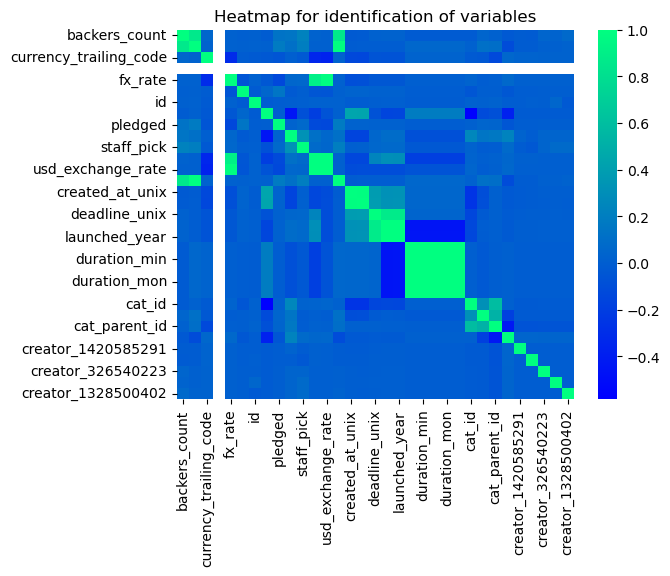

In [344]:
sns.heatmap(df_merge.corr(numeric_only=True),cmap='winter')
plt.title('Heatmap for identification of variables');

In [345]:
list_active=['backers_count',
'country',
'created_at_unix',
'deadline_unix',
'goal',
'id',
'launched_at_unix',
'state',
'state_changed_at_unix',
'usd_pledged',
'launched_year',
'duration_d',
'cat_parent_name',
'cat_name']
df_active=df_merge[list_active]

In [190]:
list_unclear=['blurb',
'creator',
'fx_rate']
df_unclear=df_merge[list_unclear]

In [191]:
list_inactive=['category',
'converted_pledged_amount',
'country_displayable_name',
'currency',
'currency_symbol',
'currency_trailing_code',
'disable_communication',
'is_starrable',
'photo',
'slug',
'source_url',
'spotlight',
'staff_pick',
'static_usd_rate',
'urls',
'usd_exchange_rate',
'usd_type',
'cat_id',
'cat_analytics_name',
'cat_slug',
'cat_position',
'cat_parent_id',
'cat_color',
'cat_url',
'pledged',
'location','name','profile','current_currency']
df_inactive=df_merge[list_inactive]

In [346]:
# Deleting of active projects
df_active=df_active[(df['state']=='successful')|(df['state']=='failed')]
df_active

,backers_count,country,created_at_unix,deadline_unix,goal,id,launched_at_unix,state,state_changed_at_unix,usd_pledged,launched_year,duration_d,cat_parent_name,cat_name
14,29,US,1663263218,1683993534,800,1365485445,1681919934,successful,1683993535,4.771000e+03,2023,24.000000,Technology,Sound
15,25,HK,1670574297,1683975733,78888,1121217238,1681383733,successful,1683975733,1.093669e+04,2023,30.000000,Technology,Sound
16,350,HK,1679577210,1682955636,100000,1022478064,1680363636,successful,1682955636,8.274465e+04,2023,30.000000,Technology,Sound
17,2289,US,1670452354,1684335569,30000,639791263,1680015569,successful,1684335569,1.240290e+06,2023,50.000000,Technology,Sound
18,258,FR,1671650977,1681855140,13900,1535101746,1678791734,successful,1681855140,3.501519e+04,2023,35.456088,Technology,Sound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,11,US,1410575938,1413339843,800,1585079050,1410747843,failed,1413339843,5.090000e+02,2014,30.000000,Comics,Webcomics
3647,31,US,1409020477,1412876120,6000,397903537,1410284120,failed,1412876120,1.345000e+03,2014,30.000000,Comics,Webcomics
3648,0,US,1409683975,1411009085,950,847769529,1410145085,failed,1411009085,0.000000e+00,2014,10.000000,Comics,Webcomics
3649,1,US,1409268605,1412492400,25000,1222348129,1409779878,failed,1412492410,2.500000e+01,2014,31.394931,Comics,Webcomics


### Visualization

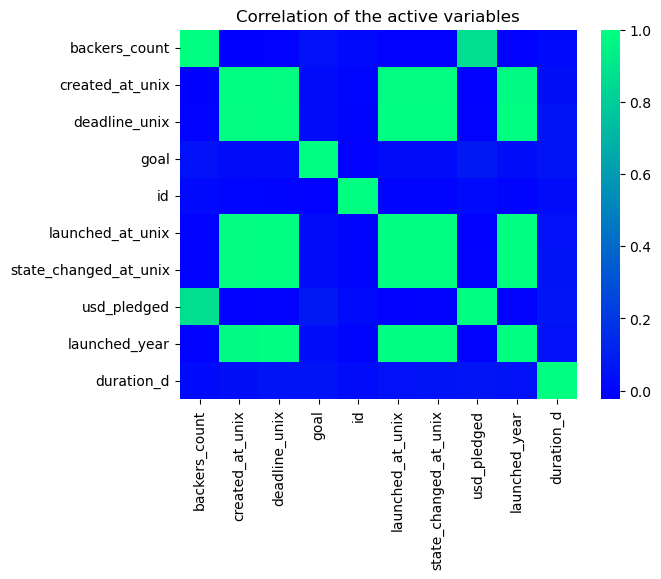

In [284]:
# Platzhalter
sns.heatmap(df_active.corr(),cmap='winter')
plt.title('Correlation of the active variables');

In [370]:
pd.DataFrame(df_active.cat_parent_name.value_counts(normalize=True))

,cat_parent_name
Comics,0.412639
Technology,0.148079
Film & Video,0.115242
Music,0.091078
Publishing,0.087670
Journalism,0.078067
Theater,0.040582
Food,0.026642


In [365]:
pd.crosstab(df_active["cat_parent_name"],df_active["cat_name"],normalize="index") # index=row %

cat_name,Audio,Comedy,Cookbooks,Literary Journals,Literary Spaces,Photo,R&B,Sound,Spaces,Webcomics
cat_parent_name,,,,,,,,,,
Comics,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
Film & Video,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
Food,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
Journalism,0.202381,0.0,0.0,0.000000,0.000000,0.797619,0.0,0.0,0.0,0.0
Music,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
Publishing,0.000000,0.0,0.0,0.236749,0.763251,0.000000,0.0,0.0,0.0,0.0
Technology,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
Theater,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0


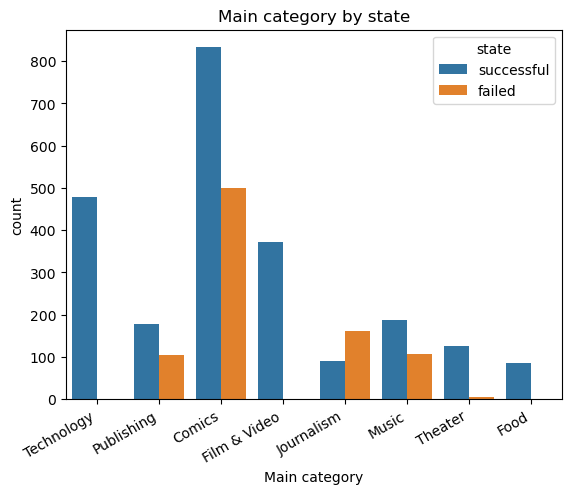

In [348]:
# Main (parent) category and success
sns.countplot(hue="state",x="cat_parent_name",data=df_active);
plt.xticks(rotation=30,ha='right');
plt.xlabel("Main category");
plt.title("Main category by state");

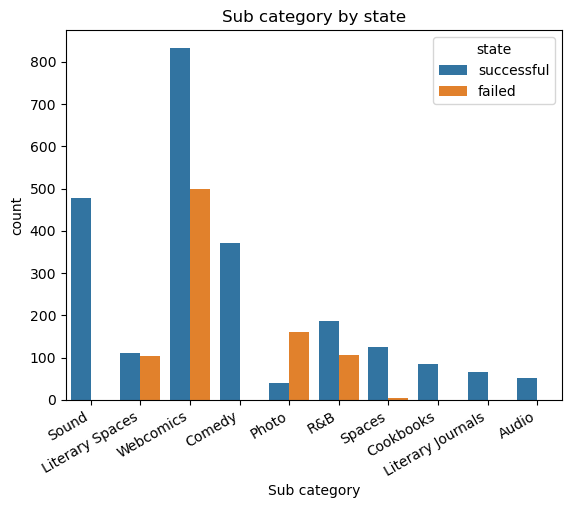

In [349]:
sns.countplot(x="cat_name",hue="state",data=df_active);
plt.xticks(rotation=30,ha='right'); # ha=horizontal alignment
plt.xlabel("Sub category");
plt.title("Sub category by state");

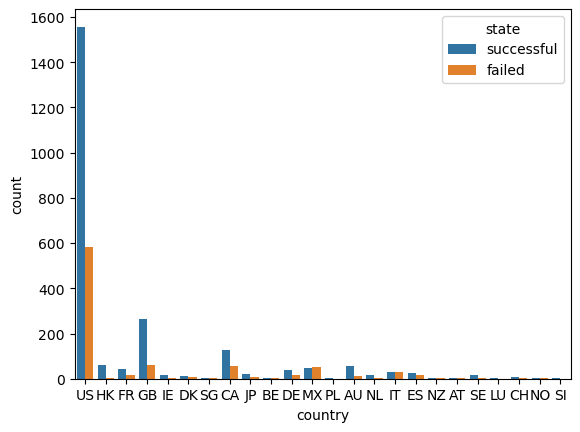

In [288]:
sns.countplot(x=df_active['country'],hue=df_active['state']);

### Preprocessing

In [194]:
df_active.isna().sum()

backers_count            0
country                  0
created_at_unix          0
deadline_unix            0
goal                     0
id                       0
launched_at_unix         0
state                    0
state_changed_at_unix    0
usd_pledged              0
launched_year            0
duration_d               0
cat_parent_name          0
cat_name                 0
creator_name             0
dtype: int64

In [195]:
# Nans in usd_pledged
from statistics import median
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
df_active['usd_pledged']=imputer.fit_transform(df_active[['usd_pledged']])

In [196]:
# Standardising the numerical variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_list=['backers_count','goal','usd_pledged','created_at_unix','deadline_unix','launched_at_unix','state_changed_at_unix']
df_active[num_list]=sc.fit_transform(df_active[num_list])

In [197]:
# Encoding of the categorocal variables
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
cat_list=['country','cat_name']
ohe_fit=ohe.fit_transform(df_active[cat_list])
column_name=ohe.get_feature_names_out(cat_list)
df_ohe=pd.DataFrame(ohe_fit,columns=column_name)

# or in one line
#df_dummies=pd.get_dummies(df_active,columns=cat_list) # and: makes drop of country and cat_name obsolete

c:\Users\Franz.000\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [198]:
# encoding of the target variable 'state'
df_active['state'].replace(['successful','failed'],[1,0],inplace=True)

In [199]:
# merging of the data
df_active.drop(['country','cat_name'],axis=1,inplace=True)
df_active['index']=df_active.index
df_ohe['index']=df_active.index
df_final=df_active.merge(right=df_ohe,on='index')

In [200]:
df_final.set_index(df_final['id'],inplace=True)
df_final.drop(['index'],axis=1,inplace=True)
df_final.drop(['id'],axis=1,inplace=True)
df_final.isna().sum().sum()

0

In [201]:
# final df ready for maschine learning 
df_final

,backers_count,created_at_unix,deadline_unix,goal,launched_at_unix,state,state_changed_at_unix,usd_pledged,launched_year,duration_d,...,cat_name_Audio,cat_name_Comedy,cat_name_Cookbooks,cat_name_Literary Journals,cat_name_Literary Spaces,cat_name_Photo,cat_name_R&B,cat_name_Sound,cat_name_Spaces,cat_name_Webcomics
id,,,,,,,,,,,,,,,,,,,,,
1365485445,-0.240016,1.455863,1.617032,-0.124568,1.627558,1,1.617032,-0.181299,2023,24.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1121217238,-0.243946,1.542095,1.616821,0.246423,1.621198,1,1.616821,-0.132262,2023,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1022478064,0.075371,1.648281,1.604728,0.346725,1.609098,1,1.604728,0.438841,2023,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
639791263,1.980467,1.540656,1.621086,0.014159,1.604969,1,1.621086,9.645033,2023,50.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1535101746,-0.015020,1.554794,1.591682,-0.062331,1.590452,1,1.591682,0.059239,2023,35.456088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585079050,-0.257701,-1.524488,-1.591501,-0.124568,-1.589008,0,-1.591502,-0.215195,2014,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397903537,-0.238051,-1.542834,-1.596999,-0.099863,-1.594508,0,-1.596999,-0.208546,2014,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
847769529,-0.268509,-1.535008,-1.619132,-0.123855,-1.596157,0,-1.619132,-0.219243,2014,10.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
